In [1]:
import os
os.environ['THEANO_FLAGS']='device=gpu'

import subprocess
import time

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import numpy as np
import pandas as pd

#my functions
from utils import load_data,my_keras_cv_predict,plot_roc

#go to working directory
work_dir='/mnt/Data1/ribli/mhc/'
os.chdir(work_dir)

Using Theano backend.
Using gpu device 0: GeForce GTX 670 (CNMeM is disabled, CuDNN 4007)
/mnt/Data1/ribli/tools/anaconda/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:5: UserWarning: downsample module has been moved to the pool module.
  warnings.warn("downsample module has been moved to the pool module.")


In [2]:
x,y=load_data(hla_representation='one-hot',seq_representation='one-hot')

Reading from file...
Creating representation...
Using  83751 data points
Done, It took: 3.20845985413 s


In [3]:
#create a very simple deepish model
from keras.models import Sequential
from keras.layers import Dense

#create model creator
def get_model(input_dim):
    """Creates Keras model needed."""
    model = Sequential()
    model.add(Dense(512, input_dim=input_dim,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model

#train
y_pred=my_keras_cv_predict(get_model,x,y,n_folds=5,patience=3,verbose=2)

Train on 60300 samples, validate on 6700 samples
Epoch 1/100
1s - loss: 0.6194 - val_loss: 0.5911
Epoch 00000: val_loss improved from inf to 0.59114, saving model to best_model
Epoch 2/100
1s - loss: 0.5525 - val_loss: 0.5249
Epoch 00001: val_loss improved from 0.59114 to 0.52486, saving model to best_model
Epoch 3/100
1s - loss: 0.4841 - val_loss: 0.4935
Epoch 00002: val_loss improved from 0.52486 to 0.49346, saving model to best_model
Epoch 4/100
1s - loss: 0.4361 - val_loss: 0.4779
Epoch 00003: val_loss improved from 0.49346 to 0.47787, saving model to best_model
Epoch 5/100
1s - loss: 0.4009 - val_loss: 0.4604
Epoch 00004: val_loss improved from 0.47787 to 0.46043, saving model to best_model
Epoch 6/100
1s - loss: 0.3702 - val_loss: 0.4521
Epoch 00005: val_loss improved from 0.46043 to 0.45211, saving model to best_model
Epoch 7/100
1s - loss: 0.3441 - val_loss: 0.4576
Epoch 00006: val_loss did not improve
Epoch 8/100
1s - loss: 0.3194 - val_loss: 0.4601
Epoch 00007: val_loss did n

AUC: 0.870482155324


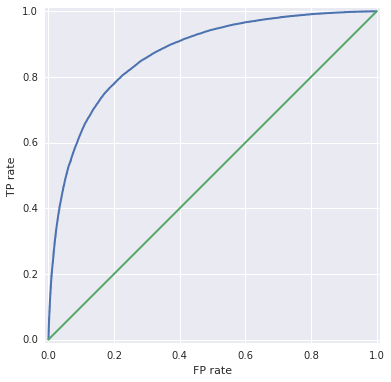

In [4]:
plot_roc(y,y_pred)